Introduction

Everyone in today's hectic society faces pressure from a variety of sources, such as employment, education, housing, health, and so forth. Individuals in this continuously stressful setting experience a wide range of health issues. According to medical professionals, heart disease, also known as cardiovascular disease, is the main cause of mortality. Heart-related diseases account for almost 31% of deaths globally, according to data released by the World Health Organization (WHO).

The heart, one of the most vital organs in the human body, continuously and regularly pumps blood to the rest of the body to maintain normal physiological activity. Its functions include carrying oxygen, nutrients, and certain metabolites. The topic of how to track cardiac health and estimate the chance of illness has attracted a lot of attention. In order to determine the likelihood of heart disease, this article focuses on the potential predictive value of age, maximum heart rate, and resting blood pressure at admission.

Missing description of the dataset….

(Word Count: 155)

In [6]:
#Packages
#test comment
library(repr)
library(tidyverse)
library(tidymodels)
library(ggplot2)
options(repr.matrix.max.rows = 10)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

In [7]:
# Variables (Column names)

# age: age in years
# sex: sex (1 = male; 0 = female)
# cp: chest pain type
# -- Value 1: typical angina
# -- Value 2: atypical angina
# -- Value 3: non-anginal pain
# -- Value 4: asymptomatic
# trestbps: resting blood pressure (in mm Hg on admission to the
# hospital)
# chol: serum cholestoral in mg/dl
# fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
# restecg: resting electrocardiographic results
# -- Value 0: normal
# -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST
#             elevation or depression of > 0.05 mV)
# -- Value 2: showing probable or definite left ventricular hypertrophy
#             by Estes' criteria
# thalach: maximum heart rate achieved
# exang: exercise induced angina (1 = yes; 0 = no)
# xhypo: (1 = yes; 0 = no)
# oldpeak = ST depression induced by exercise relative to rest
# slope: the slope of the peak exercise ST segment
# -- Value 1: upsloping
# -- Value 2: flat
# -- Value 3: downsloping
# ca: number of major vessels (0-3) colored by flourosopy
# thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
# is_disease_present: diagnosis of heart disease (angiographic disease status)
# -- Value 0: < 50% diameter narrowing
# -- Value 1: > 50% diameter narrowing

column_names <- c("age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", 
                  "thalach", "exang", "oldpeak", "slope", "ca", "thal", "is_disease_present")



heart_disease_cleveland <- read_csv("https://raw.githubusercontent.com/holiday-sean/dsci100_project/main/heart_and_disease/processed.cleveland.data", 
                                    col_names = column_names) |>
    mutate(is_disease_present = as.character(is_disease_present)) |>
    mutate(is_disease_present = as_factor(is_disease_present)) |>
    mutate(is_disease_present = fct_recode(is_disease_present, "No" = "0", "Yes" = "1", "Yes" = "2", "Yes" = "3", "Yes" = "4"))

heart_disease_cleveland

Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): ca, thal
dbl (12): age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpea...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,is_disease_present
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<fct>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,No
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,Yes
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,Yes
37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,No
41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,No
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0,Yes
68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,Yes
57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,Yes


In [8]:
heart_disease_split <- initial_split(heart_disease_cleveland, prop = 0.75, strata = is_disease_present)
cleveland_training <- training(heart_disease_split)
cleveland_testing <- testing(heart_disease_split) 

In [9]:
#Summarizing (Exploratory Analysis)

summarized_table <- cleveland_training |>
    summarize(count_disease_present = sum(is_disease_present == "Yes", na.rm = TRUE),
              count_disease_not_present = sum(is_disease_present == "No", na.rm = TRUE))

summarized_table

count_disease_present,count_disease_not_present
<int>,<int>
104,123


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


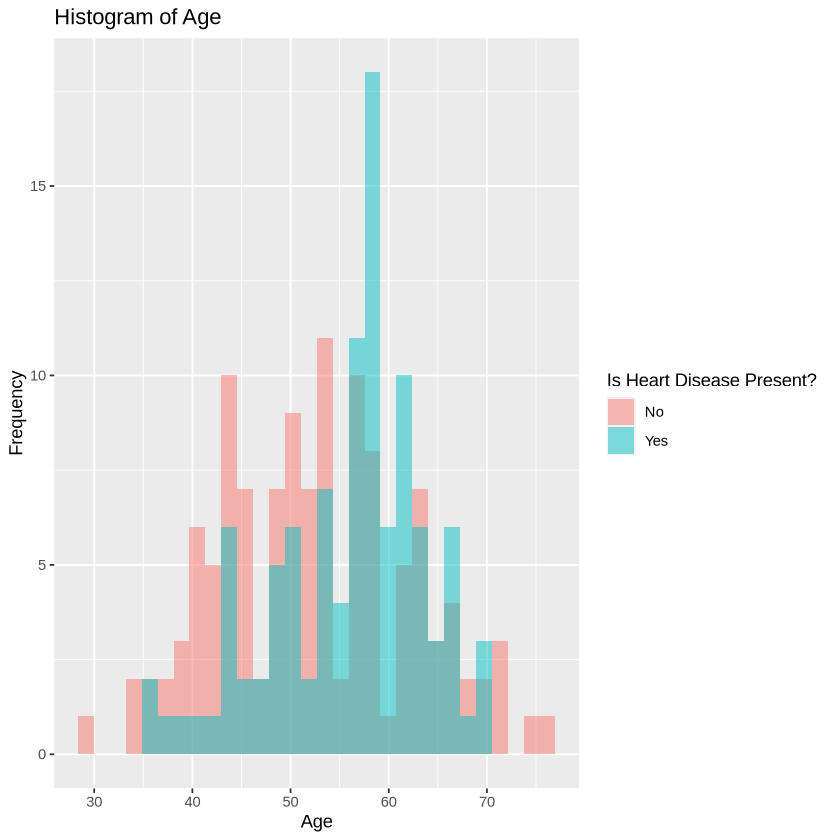

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


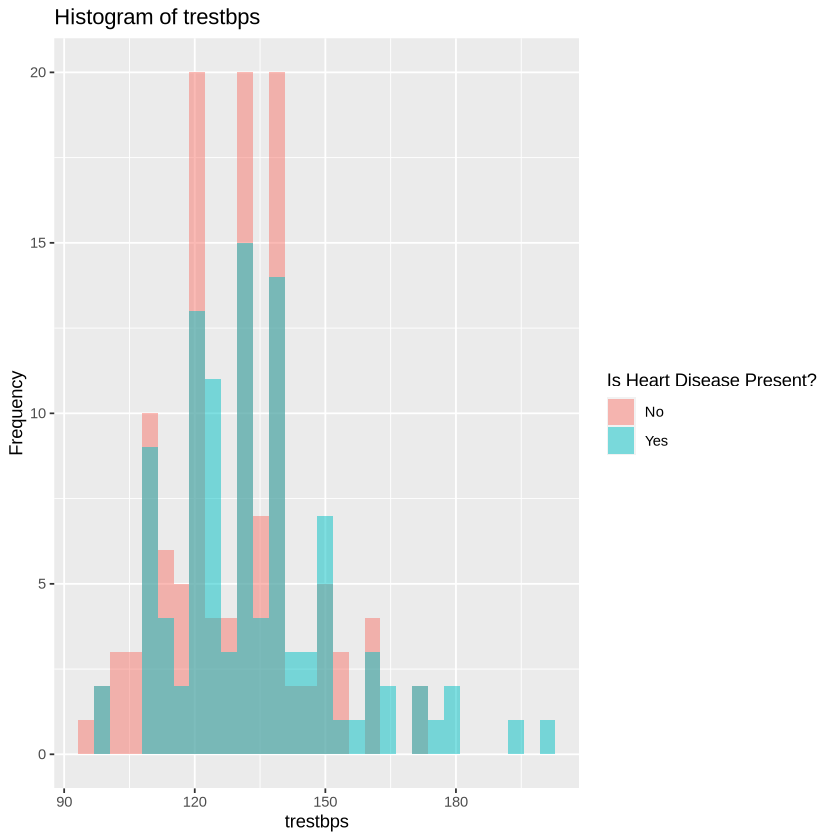

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


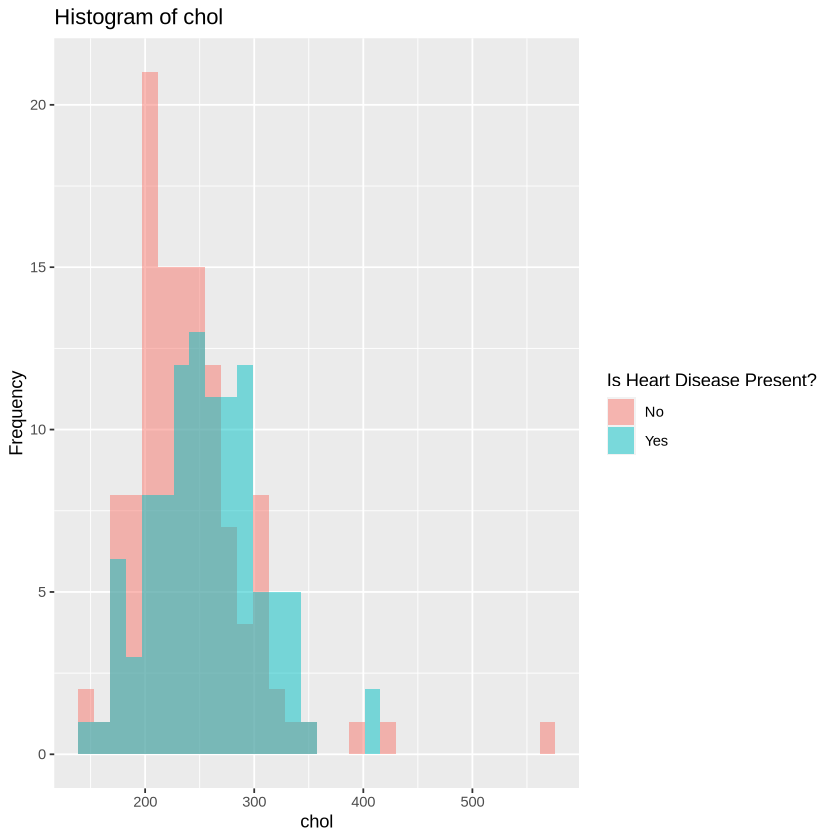

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


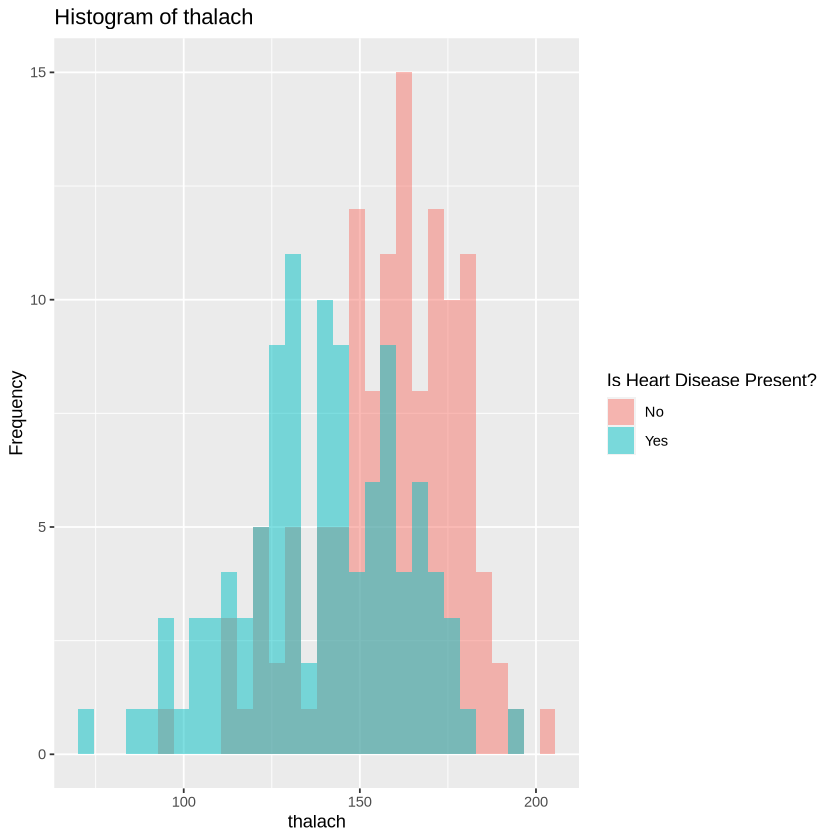

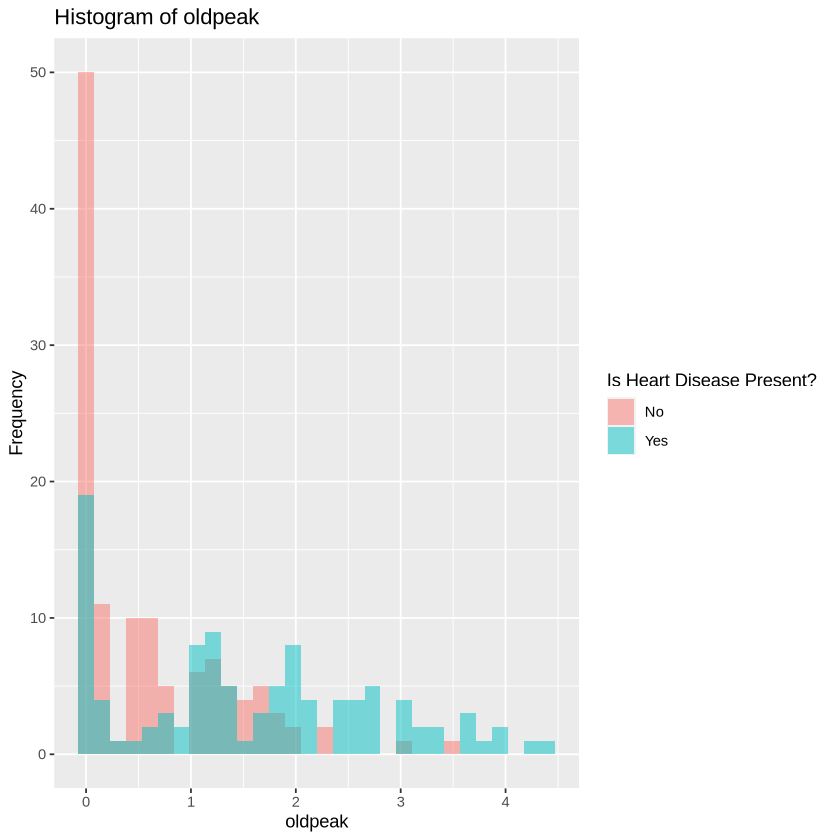

In [10]:
#Data Visualization (Exploratory Analysis)

#Quantitative Variables (age, trestbps, chol, thalach)
quantitative_vars <- c("age", "trestbps", "chol", "thalach", "oldpeak")

age_histogram <- cleveland_training %>%
  ggplot(aes(x = age, fill = is_disease_present)) + 
  geom_histogram(alpha = 0.5,               
                 position = "identity") +  
  labs(x = "Age", y = "Frequency", title = "Histogram of Age", fill = "Is Heart Disease Present?")

trestbps_histogram <- cleveland_training %>%
  ggplot(aes(x = trestbps, fill = is_disease_present)) + 
  geom_histogram(alpha = 0.5,               
                 position = "identity") +  
  labs(x = "trestbps", y = "Frequency", title = "Histogram of trestbps", fill = "Is Heart Disease Present?")

chol_histogram <- cleveland_training %>%
  ggplot(aes(x = chol, fill = is_disease_present)) +  
  geom_histogram(alpha = 0.5,               
                 position = "identity") +  
  labs(x = "chol", y = "Frequency", title = "Histogram of chol", fill = "Is Heart Disease Present?")   

thalach_histogram <- cleveland_training %>%
  ggplot(aes(x = thalach, fill = is_disease_present)) +  
  geom_histogram(alpha = 0.5,               
                 position = "identity") +  
  labs(x = "thalach", y = "Frequency", title = "Histogram of thalach", fill = "Is Heart Disease Present?")

oldpeak_histogram <- cleveland_training %>%
  ggplot(aes(x = oldpeak, fill = is_disease_present)) +  
  geom_histogram(alpha = 0.5,               
                 position = "identity") +  
  labs(x = "oldpeak", y = "Frequency", title = "Histogram of oldpeak", fill = "Is Heart Disease Present?")   

age_histogram
trestbps_histogram
chol_histogram
thalach_histogram
oldpeak_histogram

`summarise()` has grouped output by 'is_disease_present'. You can override
using the `.groups` argument.
`summarise()` has grouped output by 'is_disease_present'. You can override
using the `.groups` argument.


is_disease_present,cp,count
<fct>,<fct>,<int>
No,Typical Angina,11
No,Atypical Angina,30
No,Non-Anginal Pain,50
No,Asymptomatic,32
Yes,Typical Angina,4
Yes,Atypical Angina,7
Yes,Non-Anginal Pain,11
Yes,Asymptomatic,82


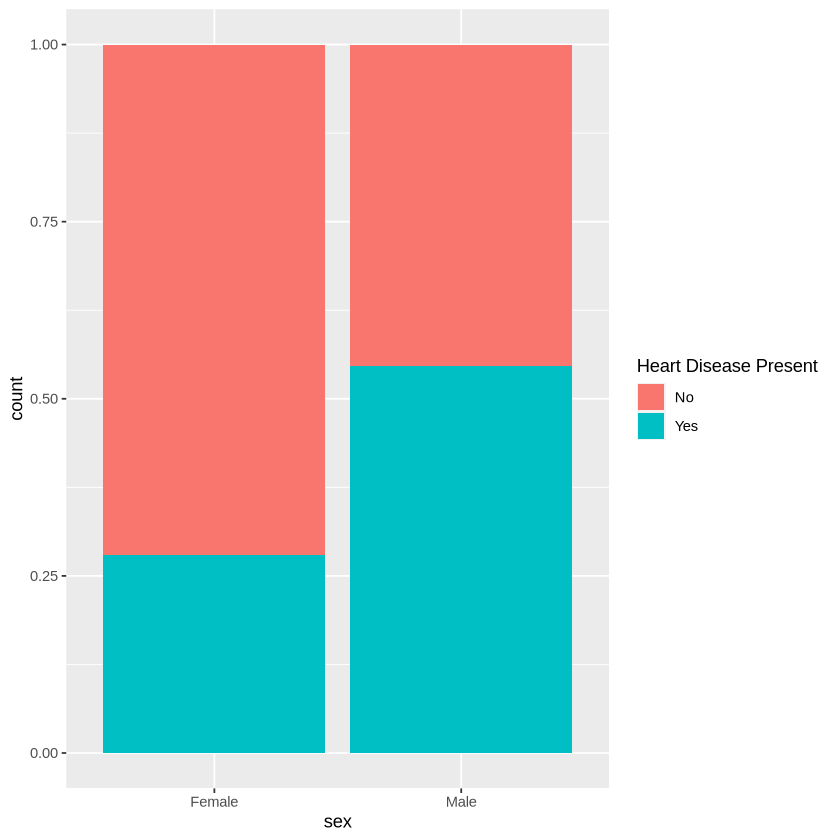

`summarise()` has grouped output by 'is_disease_present'. You can override
using the `.groups` argument.


is_disease_present,count,exercise_induced_angina
<fct>,<int>,<fct>
No,110,No
No,13,Yes
Yes,48,No
Yes,56,Yes


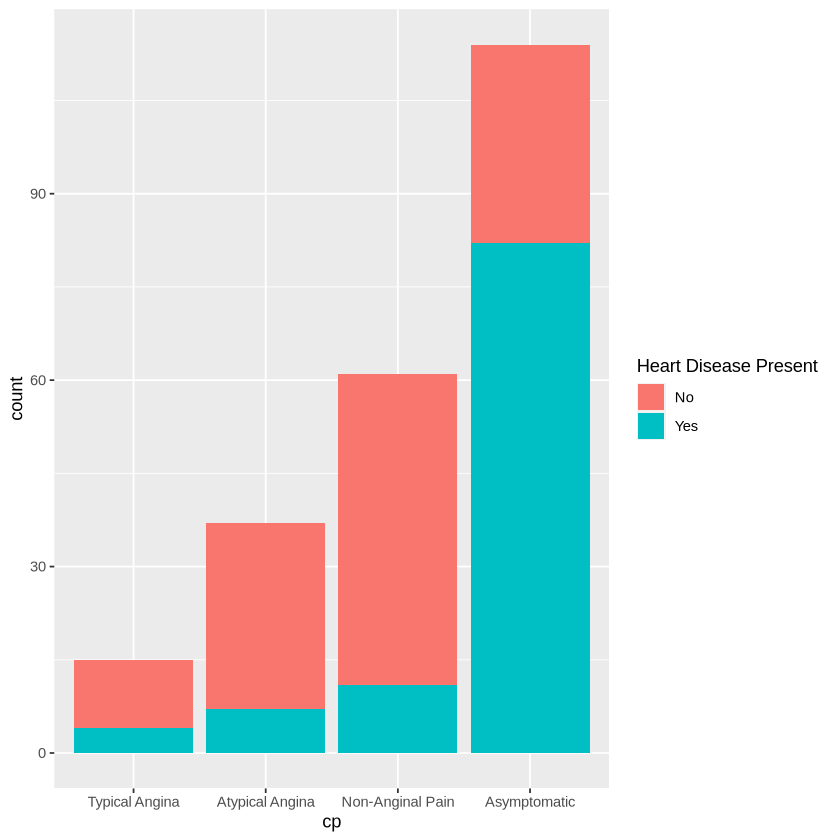

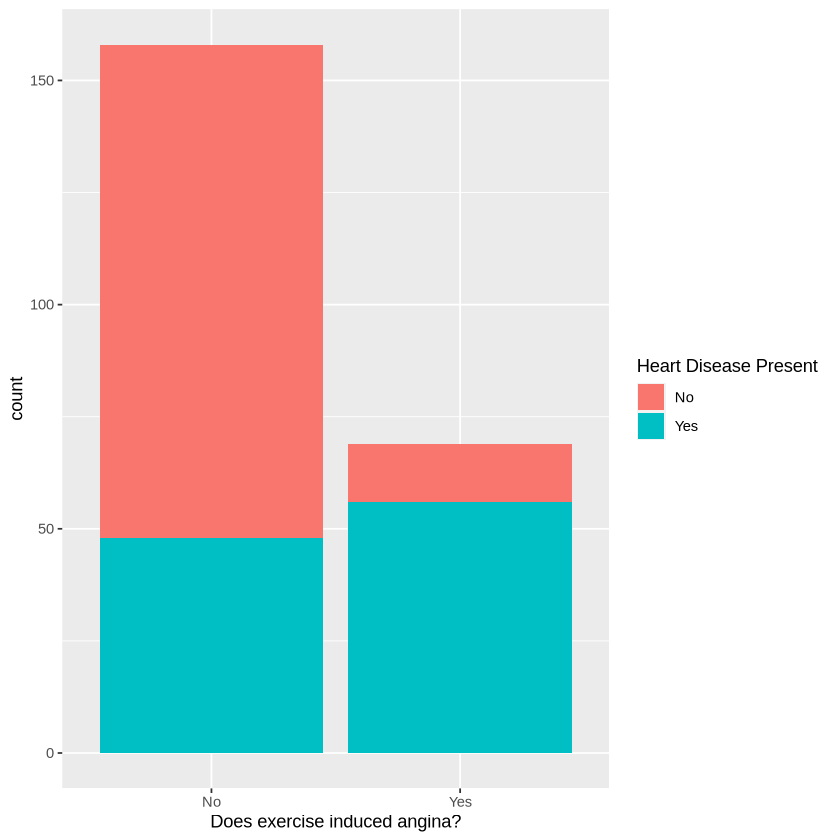

In [12]:
#Data Visualization (Exploratory Analysis - We probably will not use this...)

#Qualitative Variables (sex, cp, fbs, restecg, exang, xhypo, slope, ca, thal)


sex_data <- cleveland_training |>
    group_by(is_disease_present, sex) |>
    summarize(count = n()) |>
    mutate(sex = as.character(sex)) |>
    mutate(sex = fct_recode(sex, "Male" = "1", "Female" = "0"))

sex_plot <- sex_data |>
    ggplot(aes(x = sex,y = count, fill = is_disease_present)) + 
    geom_bar(stat = "identity", position = "fill") + 
    labs(fill = "Heart Disease Present")

sex_plot

cp_data <- cleveland_training |>
    group_by(is_disease_present, cp) |>
    summarize(count = n()) |>
    mutate(cp = as.character(cp)) |>
    mutate(cp = fct_recode(cp, "Typical Angina" = "1", 
                                "Atypical Angina" = "2",
                                "Non-Anginal Pain" = "3",
                                "Asymptomatic" = "4"))

cp_data

cp_plot <- cp_data |>
    ggplot(aes(x = cp, y = count, fill = is_disease_present)) + 
    geom_bar(stat = "identity") + 
    labs(fill = "Heart Disease Present")

cp_plot

exang_data <- cleveland_training |>
    group_by(is_disease_present, exang) |>
    summarize(count = n()) |>
    mutate(exang = as.character(exang)) |>
    mutate(exang = fct_recode(exang, "No" = "0", "Yes" = "1")) |>
    mutate(exercise_induced_angina = exang) |>
    select(-exang) 
    
exang_data

exang_plot <- exang_data |>
    ggplot(aes(x = exercise_induced_angina, y = count, fill = is_disease_present)) + 
    geom_bar(stat = "identity") + 
    labs(fill = "Heart Disease Present", x = "Does exercise induced angina?")

exang_plot

